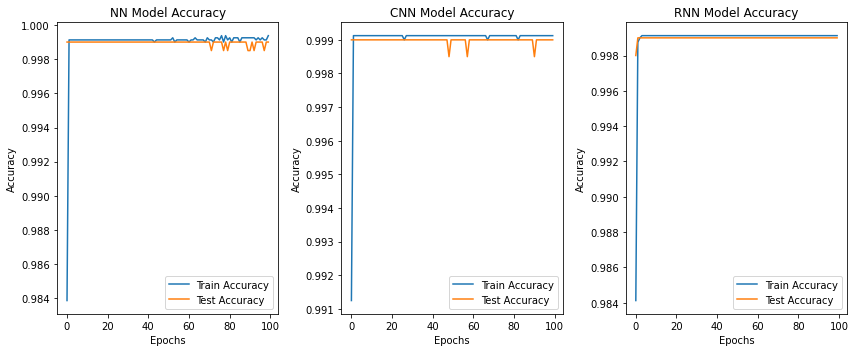

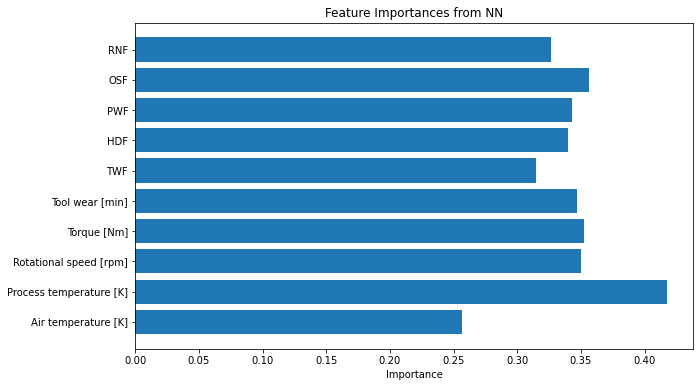

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
data_path = r"C:\Users\USAID\Desktop\kaggle\ai 2020.csv"  # Change this to your actual data path
data = pd.read_csv(data_path)

# Data Preprocessing
# Convert categorical variables if necessary and separate features and target variable
X = data.drop(columns=['Machine failure', 'UDI', 'Product ID', 'Type'])
y = data['Machine failure']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN and RNN
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define a Feedforward Neural Network (NN)
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_history = nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=10, verbose=0)

# Define a Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=100, batch_size=10, verbose=0)

# Define a Recurrent Neural Network (RNN)
rnn_model = Sequential([
    LSTM(16, input_shape=(X_train_cnn.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=100, batch_size=10, verbose=0)

# Plotting the training history for NN
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(nn_history.history['accuracy'], label='Train Accuracy')
plt.plot(nn_history.history['val_accuracy'], label='Test Accuracy')
plt.title('NN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training history for CNN
plt.subplot(1, 3, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Test Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training history for RNN
plt.subplot(1, 3, 3)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Test Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Feature Importance (for NN)
importances = nn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(importances), axis=1)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), X.columns)
plt.xlabel('Importance')
plt.title('Feature Importances from NN')
plt.show()
